DATASET 1: Convolutional Neural Network Models Predicting ASL letters

In [65]:
import cv2 as cv
import os
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(columns = ['images', 'label'])
train_path = './rawdata/asl_dataset_og'
test_path = './rawdata/asl_dataset/'
folders = glob(train_path+'/*')
noclasses = len(folders)

In [4]:
from keras.preprocessing.image import ImageDataGenerator
batch_size=100
datagen = ImageDataGenerator(#rescale=1.0/255, 
                             #shear_range=0.2, 
                             #zoom_range=0.2, 
                             #horizontal_flip=True,
                             validation_split=0.3)
train_generator = datagen.flow_from_directory(train_path, 
                                              shuffle=True,
                                              target_size = (50,50),
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              subset='training') # set as training data

train_generator.class_indices

Using TensorFlow backend.


Found 1271 images belonging to 26 classes.


{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [5]:
test_generator = datagen.flow_from_directory(train_path, 
                                             shuffle=False,
                                             target_size = (50,50),
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             subset='validation') # set as validation data

Found 544 images belonging to 26 classes.


In [37]:
test_lg_path = '.\\raw data\\asl_dataset'
batch_size2=1
datagen2 = ImageDataGenerator()#rescale=1.0/255, 
                             #shear_range=0.2, 
                             #zoom_range=0.2, 
                             #horizontal_flip=True,
                             #validation_split=.9)
test_lg = datagen2.flow_from_directory(test_lg_path, 
                                              shuffle=False,
                                              target_size = (50,50),
                                               batch_size = batch_size2,
                                              class_mode = 'categorical') # set as training data

test_lg.class_indices

Found 26 images belonging to 26 classes.


{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

(-0.5, 49.5, 49.5, -0.5)

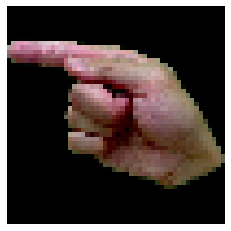

In [7]:
i=0
t_x, t_y = train_generator.__getitem__(i)
# plot image
plt.imshow(t_x[i].astype('uint8'))
plt.axis('off')

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
input_shape=(50,50,3)

model1 = tf.keras.Sequential(
  [
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape ,filters=32, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3),input_shape=input_shape ,filters=32, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=64, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=64, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),


      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(26, activation='softmax')
  ])
model1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
input_shape=(50,50,3)

model2 = tf.keras.Sequential(
  [
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape ,filters=32, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3),input_shape=input_shape ,filters=32, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=64, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=64, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),


      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1024, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(26, activation='softmax')
  ])
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [19]:
from keras import regularizers
input_shape=(50,50,3)

model3 = tf.keras.Sequential(
  [
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape ,kernel_regularizer=regularizers.l2(l=0.01), filters=32, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3),input_shape=input_shape ,kernel_regularizer=regularizers.l2(l=0.01),filters=32, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,kernel_regularizer=regularizers.l2(l=0.01), filters=64, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,kernel_regularizer=regularizers.l2(l=0.01), filters=64, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),


      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1024, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(26, activation='softmax')
  ])
model3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 2, 2, 64)         

In [21]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 2, 2, 64)         

In [22]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 2, 2, 64)         

In [23]:
from keras.callbacks import EarlyStopping 
early_stop = EarlyStopping(monitor='loss', patience=2)

In [24]:
history = model1.fit(train_generator, epochs=50, validation_data=test_generator)

Train for 13 steps, validate for 6 steps
Epoch 1/50
13/13 [==============================] - 7s 570ms/step - loss: 13.4609 - accuracy: 0.0928 - val_loss: 3.2073 - val_accuracy: 0.1673
Epoch 2/50
13/13 [==============================] - 6s 428ms/step - loss: 2.6076 - accuracy: 0.2470 - val_loss: 2.6424 - val_accuracy: 0.2721
Epoch 3/50
13/13 [==============================] - 6s 431ms/step - loss: 1.7990 - accuracy: 0.4713 - val_loss: 2.0327 - val_accuracy: 0.4449
Epoch 4/50
13/13 [==============================] - 6s 452ms/step - loss: 1.2297 - accuracy: 0.6263 - val_loss: 1.6673 - val_accuracy: 0.4706
Epoch 5/50
13/13 [==============================] - 6s 444ms/step - loss: 0.8937 - accuracy: 0.7199 - val_loss: 1.1838 - val_accuracy: 0.6544
Epoch 6/50
13/13 [==============================] - 6s 455ms/step - loss: 0.3521 - accuracy: 0.8906 - val_loss: 0.8812 - val_accuracy: 0.7426
Epoch 7/50
13/13 [==============================] - 6s 465ms/step - loss: 0.5734 - accuracy: 0.8560 - val_

In [25]:
history2 = model2.fit(train_generator, epochs=50, validation_data=test_generator)

Train for 13 steps, validate for 6 steps
Epoch 1/50
13/13 [==============================] - 8s 626ms/step - loss: 4.7026 - accuracy: 0.0968 - val_loss: 2.7998 - val_accuracy: 0.1838
Epoch 2/50
13/13 [==============================] - 7s 513ms/step - loss: 2.6426 - accuracy: 0.2164 - val_loss: 2.1449 - val_accuracy: 0.3474
Epoch 3/50
13/13 [==============================] - 7s 535ms/step - loss: 2.2678 - accuracy: 0.3375 - val_loss: 1.9862 - val_accuracy: 0.4338
Epoch 4/50
13/13 [==============================] - 7s 535ms/step - loss: 1.5024 - accuracy: 0.5256 - val_loss: 0.9667 - val_accuracy: 0.7371
Epoch 5/50
13/13 [==============================] - 7s 521ms/step - loss: 1.1319 - accuracy: 0.6389 - val_loss: 0.8666 - val_accuracy: 0.7004
Epoch 6/50
13/13 [==============================] - 7s 522ms/step - loss: 0.8384 - accuracy: 0.7333 - val_loss: 0.5525 - val_accuracy: 0.8272
Epoch 7/50
13/13 [==============================] - 7s 545ms/step - loss: 0.4545 - accuracy: 0.8466 - val_l

In [26]:
history3 = model3.fit(train_generator, epochs=50, validation_data=test_generator)

Train for 13 steps, validate for 6 steps
Epoch 1/50
13/13 [==============================] - 8s 625ms/step - loss: 6.6527 - accuracy: 0.0582 - val_loss: 4.4006 - val_accuracy: 0.1195
Epoch 2/50
13/13 [==============================] - 7s 517ms/step - loss: 4.4072 - accuracy: 0.1039 - val_loss: 4.0275 - val_accuracy: 0.1893
Epoch 3/50
13/13 [==============================] - 6s 499ms/step - loss: 3.8824 - accuracy: 0.1707 - val_loss: 3.6097 - val_accuracy: 0.2224
Epoch 4/50
13/13 [==============================] - 7s 533ms/step - loss: 3.3849 - accuracy: 0.2927 - val_loss: 2.7700 - val_accuracy: 0.4724
Epoch 5/50
13/13 [==============================] - 7s 520ms/step - loss: 2.7278 - accuracy: 0.4453 - val_loss: 1.9990 - val_accuracy: 0.6728
Epoch 6/50
13/13 [==============================] - 7s 551ms/step - loss: 2.2537 - accuracy: 0.5704 - val_loss: 1.8135 - val_accuracy: 0.6213
Epoch 7/50
13/13 [==============================] - 7s 516ms/step - loss: 1.9598 - accuracy: 0.6546 - val_l

In [64]:
history4 = model4.fit(train_generator, epochs=10, validation_data=test_generator)

FileNotFoundError: [Errno 2] No such file or directory: './raw data/asl_dataset_og\\g\\hand5_g_dif_seg_4_cropped.jpeg'

In [27]:
model1.save('C:\\Users\\abige\\Documents\\ASL\\EE382_ASL_recognition\\CNN_Models\\Model1_data1')
model2.save('C:\\Users\\abige\\Documents\\ASL\\EE382_ASL_recognition\\CNN_Models\\Model2_data1')
model3.save('C:\\Users\\abige\\Documents\\ASL\\EE382_ASL_recognition\\CNN_Models\\Model3_data1')
model4.save('C:\\Users\\abige\\Documents\\ASL\\EE382_ASL_recognition\\CNN_Models\\Model4_data1')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Users\abige\Documents\ASL\EE382_ASL_recognition\CNN_Models\Model1_data1\assets
INFO:tensorflow:Assets written to: C:\Users\abige\Documents\ASL\EE382_ASL_recognition\CNN_Models\Model2_data1\assets
INFO:tensorflow:Assets written to: C:\Users\abige\Documents\ASL\EE382_ASL_recognition\CNN_Models\Model3_data1\assets


In [29]:
import numpy as np
pred1 = model1.predict(test_generator)
y_pred1 = np.zeros(pred1.shape[0])

pred2 = model2.predict(test_generator)
y_pred2 = np.zeros(pred2.shape[0])

pred3 = model3.predict(test_generator)
y_pred3 = np.zeros(pred3.shape[0])

it = 0
for i in pred1:
    y_pred1[it] = np.argmax(i)
    y_pred2[it] = np.argmax(i)
    y_pred3[it] = np.argmax(i)
    it+=1

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
y_true = test_generator.classes
cm1 = confusion_matrix(y_true, y_pred1)
cm2 = confusion_matrix(y_true, y_pred2)
cm3 = confusion_matrix(y_true, y_pred3)

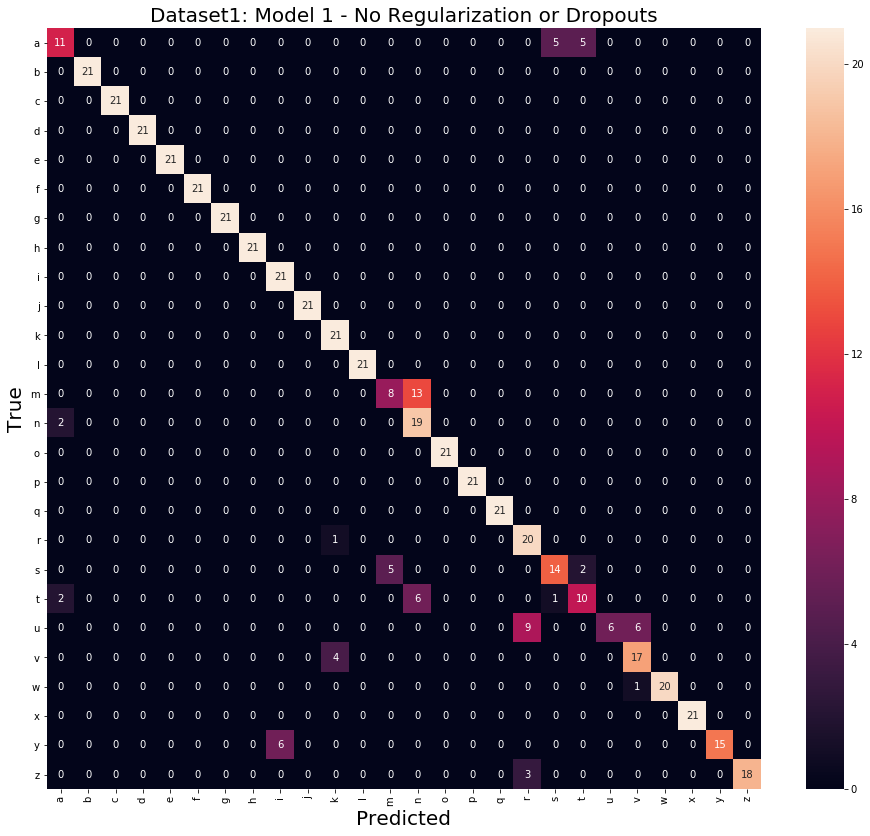

In [33]:
import seaborn as sns
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm1, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.tick_bottom()
ax.xaxis.set_ticklabels(test_generator.class_indices, fontsize = 10)
ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(test_generator.class_indices, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Dataset1: Model 1 - No Regularization or Dropouts', fontsize=20)

plt.savefig('CM1_dataset1.png')
plt.show()

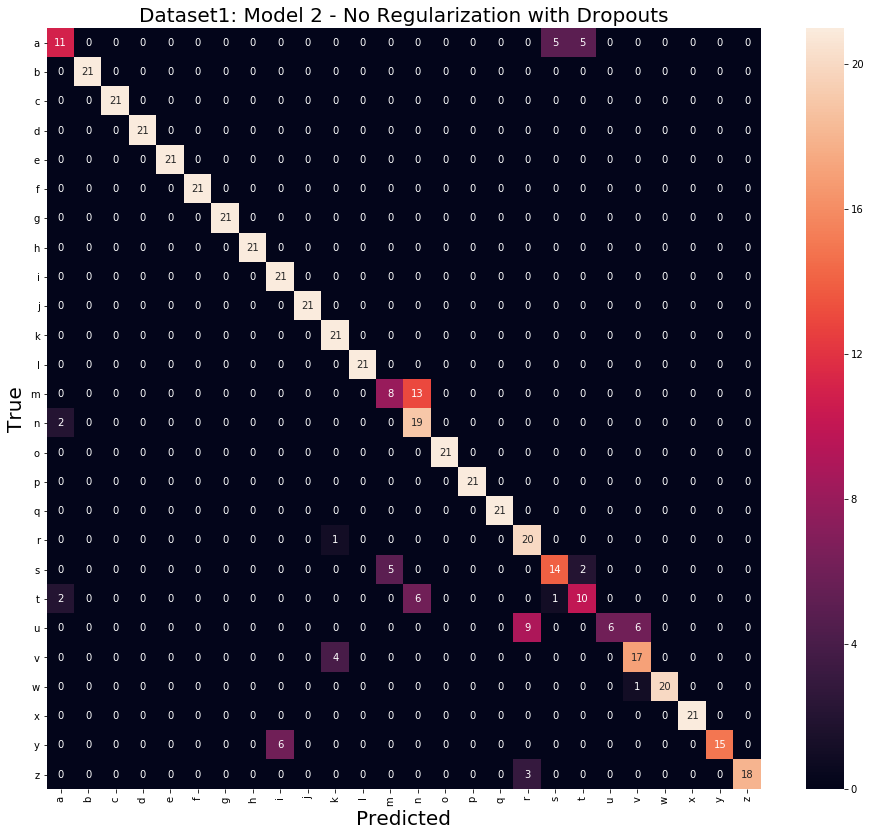

In [35]:
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm2, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.tick_bottom()
ax.xaxis.set_ticklabels(test_generator.class_indices, fontsize = 10)
ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(test_generator.class_indices, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Dataset1: Model 2 - No Regularization with Dropouts', fontsize=20)

plt.savefig('CM2_dataset1.png')
plt.show()

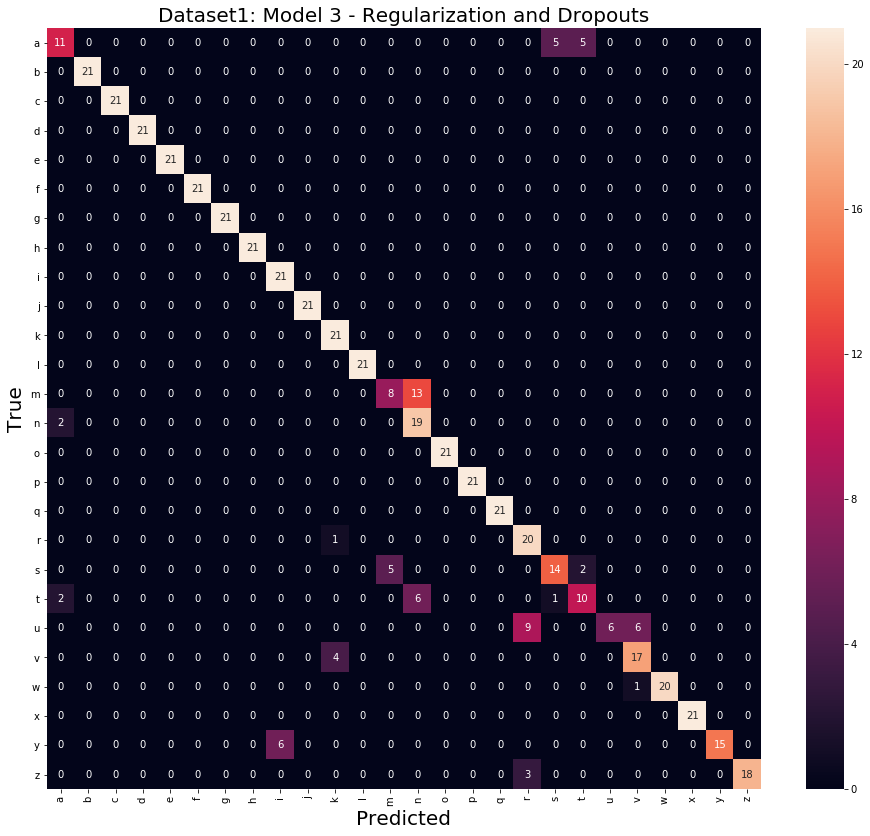

In [36]:
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm3, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.tick_bottom()
ax.xaxis.set_ticklabels(test_generator.class_indices, fontsize = 10)
ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(test_generator.class_indices, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Dataset1: Model 3 - Regularization and Dropouts', fontsize=20)

plt.savefig('CM3_dataset1.png')
plt.show()

CONFUSION MATRIX FOR INDEPENDENT DATA PREDICTIONS

In [40]:
import numpy as np
pred1 = model1.predict(test_lg)
y_pred1 = np.zeros(pred1.shape[0])

pred2 = model2.predict(test_lg)
y_pred2 = np.zeros(pred2.shape[0])

pred3 = model3.predict(test_lg)
y_pred3 = np.zeros(pred3.shape[0])

it = 0
for i in pred1:
    y_pred1[it] = np.argmax(i)
    y_pred2[it] = np.argmax(i)
    y_pred3[it] = np.argmax(i)
    it+=1

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
y_true = test_lg.classes
cm1 = confusion_matrix(y_true, y_pred1)
cm2 = confusion_matrix(y_true, y_pred2)
cm3 = confusion_matrix(y_true, y_pred3)

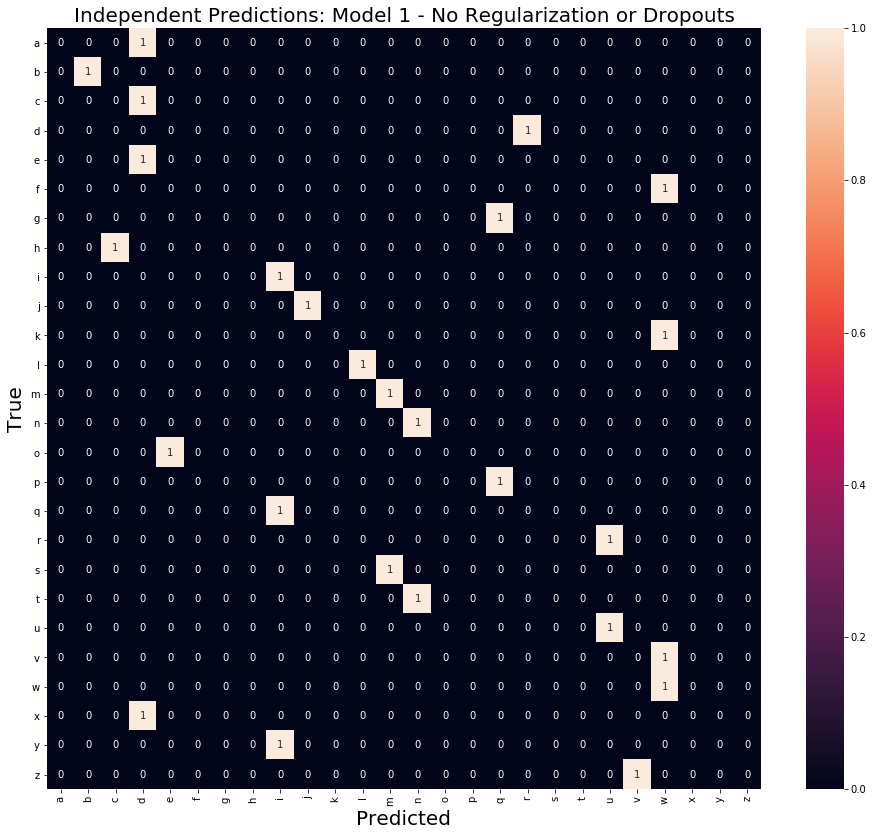

In [42]:
import seaborn as sns
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm1, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.tick_bottom()
ax.xaxis.set_ticklabels(test_generator.class_indices, fontsize = 10)
ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(test_generator.class_indices, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Independent Predictions: Model 1 - No Regularization or Dropouts', fontsize=20)

plt.savefig('Ind_CM1_dataset1.png')
plt.show()

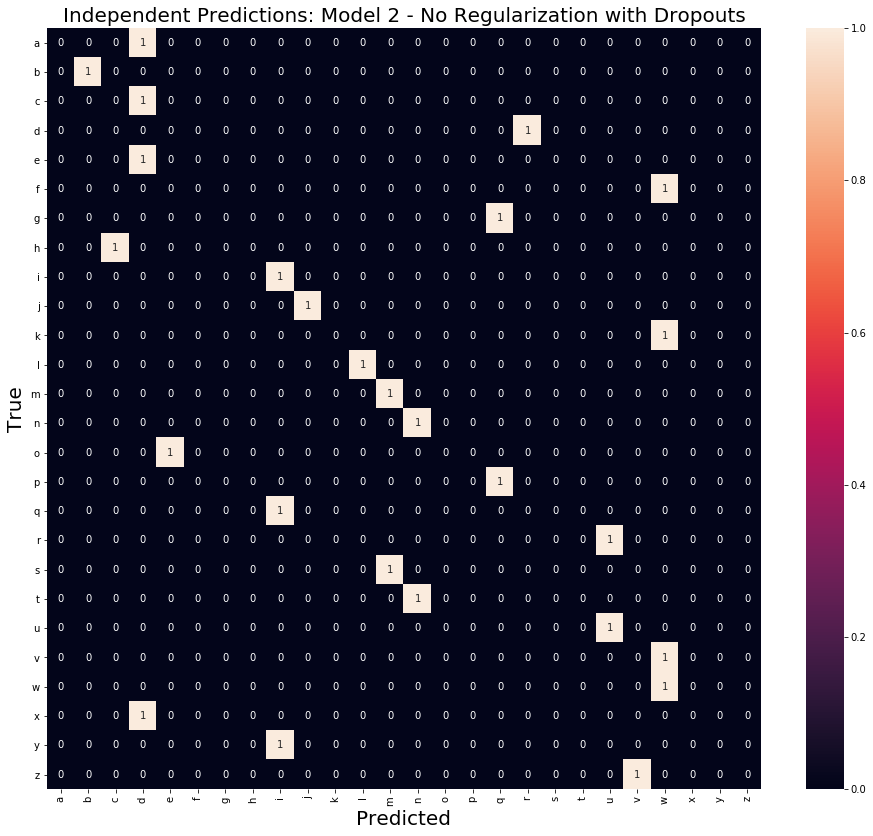

In [43]:
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm2, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.tick_bottom()
ax.xaxis.set_ticklabels(test_generator.class_indices, fontsize = 10)
ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(test_generator.class_indices, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Independent Predictions: Model 2 - No Regularization with Dropouts', fontsize=20)

plt.savefig('Ind_CM2_dataset1.png')
plt.show()

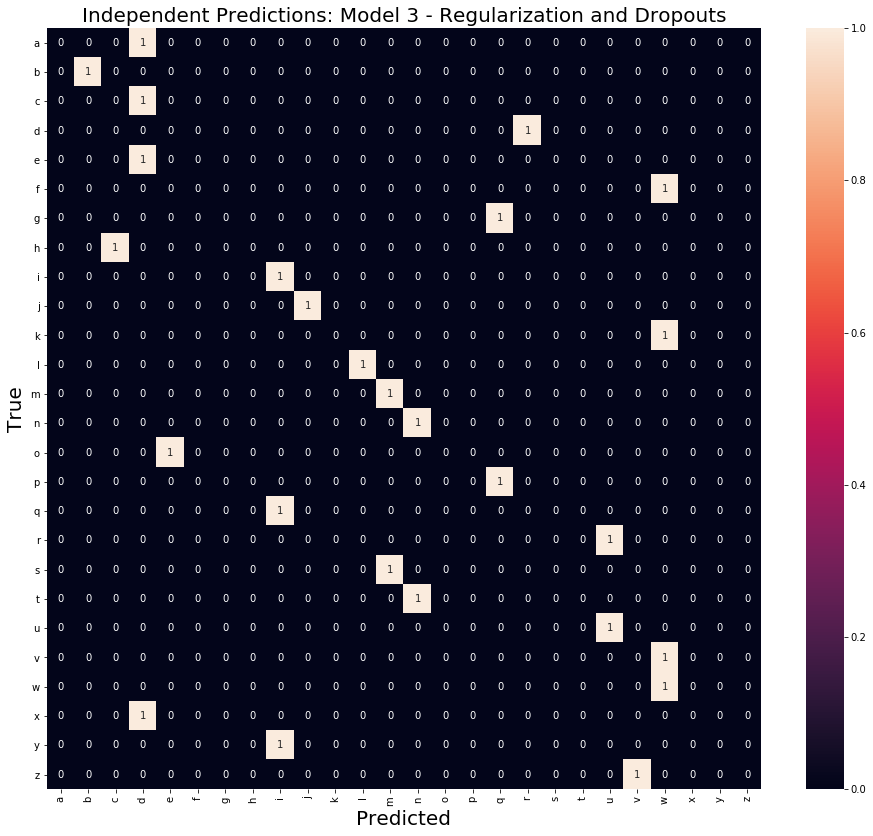

In [44]:
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm3, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.tick_bottom()
ax.xaxis.set_ticklabels(test_generator.class_indices, fontsize = 10)
ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(test_generator.class_indices, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Independent Predictions: Model 3 - Regularization and Dropouts', fontsize=20)

plt.savefig('Ind_CM3_dataset1.png')
plt.show()

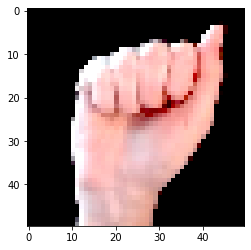

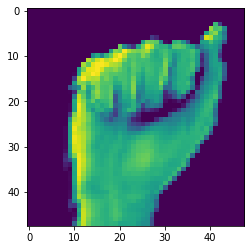

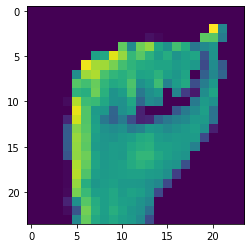

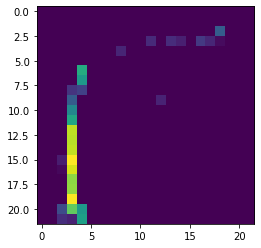

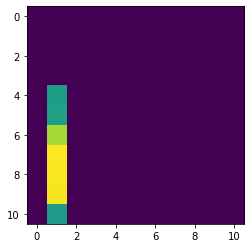

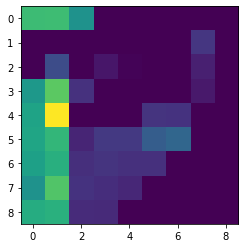

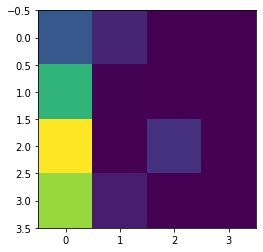

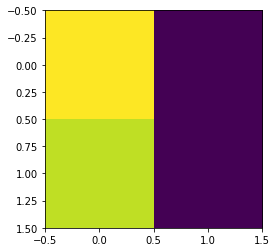

In [52]:
from tensorflow.keras import preprocessing
from tensorflow.keras import backend as K
from tensorflow.keras import models

image = test_lg.__getitem__(0)[0][0]
img_tensor = preprocessing.image.img_to_array(image)
img_tensor = np.expand_dims(img_tensor, axis=0)
hm = []
for l in range(8):
    if(l == 0):
        input_layer = img_tensor#model.get_layer("model_input")
    else:
        input_layer = model3.layers[l-1]
    conv_layer = model3.layers[l]
    heatmap_model = models.Model([model3.inputs], [conv_layer.output, model3.output])

    # Get gradient of the winner class w.r.t. the output of the (last) conv. layer
    with tf.GradientTape() as gtape:
        conv_output, predictions = heatmap_model(img_tensor)
        loss = predictions[:, np.argmax(predictions[0])]
        grads = gtape.gradient(loss, conv_output)
        pooled_grads = K.mean(grads, axis=(0, 1, 2))

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    hm.append(np.squeeze(heatmap))
plt.figure()
plt.imshow(test_lg.__getitem__(0)[0][0].astype('uint8'))
plt.savefig('hm_dataset1_1.png')
plt.figure()
plt.imshow(hm[0])
plt.savefig('hm_dataset1_2.png')
plt.figure()
plt.imshow(hm[1])
plt.savefig('hm_dataset1_3.png')
plt.figure()
plt.imshow(hm[2])
plt.savefig('hm_dataset1_4.png')
plt.figure()
plt.imshow(hm[3])
plt.savefig('hm_dataset1_5.png')
plt.figure()
plt.imshow(hm[4])
plt.savefig('hm_dataset1_6.png')
plt.figure()
plt.imshow(hm[5])
plt.savefig('hm_dataset1_7.png')
plt.figure()
plt.imshow(hm[6])
plt.savefig('hm_dataset1_8.png')

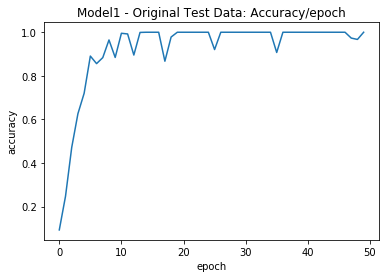

In [53]:
plt.figure()
plt.title("Model1 - Original Test Data: Accuracy/epoch")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'])

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred1,target_names=test_lg.class_indices))

              precision    recall  f1-score   support

           a       0.00      0.00      0.00         1
           b       1.00      1.00      1.00         1
           c       0.00      0.00      0.00         1
           d       0.00      0.00      0.00         1
           e       0.00      0.00      0.00         1
           f       0.00      0.00      0.00         1
           g       0.00      0.00      0.00         1
           h       0.00      0.00      0.00         1
           i       0.33      1.00      0.50         1
           j       1.00      1.00      1.00         1
           k       0.00      0.00      0.00         1
           l       1.00      1.00      1.00         1
           m       0.50      1.00      0.67         1
           n       0.50      1.00      0.67         1
           o       0.00      0.00      0.00         1
           p       0.00      0.00      0.00         1
           q       0.00      0.00      0.00         1
           r       0.00    

C:\Users\abige\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


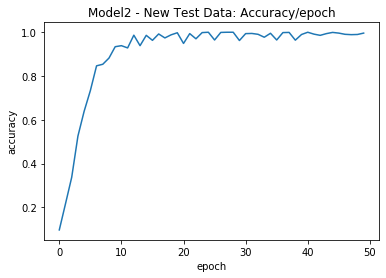

In [57]:
plt.figure()
plt.title("Model2 - New Test Data: Accuracy/epoch")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(history2.history['accuracy'])

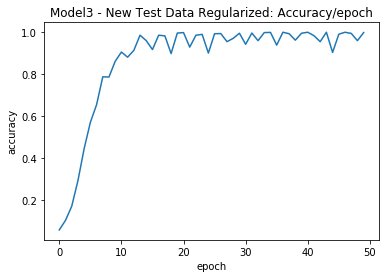

In [58]:
plt.figure()
plt.title("Model3 - New Test Data Regularized: Accuracy/epoch")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(history3.history['accuracy'])

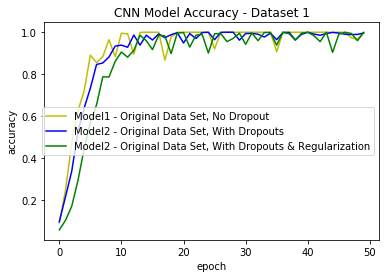

In [61]:
plt.figure()
plt.title("CNN Model Accuracy - Dataset 1")
plt.plot(history.history['accuracy'], color = 'y', label = 'Model1 - Original Data Set, No Dropout')
plt.plot(history2.history['accuracy'], color = 'b', label = 'Model2 - Original Data Set, With Dropouts')
plt.plot(history3.history['accuracy'], color = 'g', label = 'Model2 - Original Data Set, With Dropouts & Regularization')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()